# GOAL2: Use the cleaned dataset with Pandas to perform EDA 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import warnings
import seaborn as sns
#warnings.filterwarnings('ignore')
# remove warnings

## For the EDA part of the project we will use Pandas to handle the already cleaned dataset

In [2]:
# Import the csv file
df = pd.read_csv("../Clean_Data/2024/clean_dataset_legislative_2024.csv", sep=";")

C:\Users\Ronan\AppData\Local\Temp\ipykernel_22944\3724310998.py:2: DtypeWarning: Columns (0,2,82,83,84,85,87,88,91,92,93,94,96,97,100,101,102,103,105,106,109,110,111,112,114,115,118,119,120,121,123,124,127,128,129,130,132,133,136,137,138,139,141,142,145,146,147,148,150,151,154,155,156,157,159,160,163,164,165,166,168,169,172,173,174,175,177,178) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Clean_Data/2024/clean_dataset_legislative_2024.csv", sep=";")


In [3]:
# Show top 5 rows
df.head(5)

,Code_département,Libellé_département,Code_commune,Libellé_commune,Inscrits,Votants,Pourcentage_Votants,Abstentions,Pourcentage_Abstentions,Exprimés,...,Numéro_de_panneau_18,Nuance_candidat_18,Nom_candidat_18,Prénom_candidat_18,Sexe_candidat_18,Voix_18,Pourcentage_Voix/inscrits_18,Pourcentage_Voix/exprimés_18,Elu_18,Nombre_candidats
0,1,Ain,1001,L'Abergement-Clémenciat,662,494,74.62,168,25.38,476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2
1,1,Ain,1002,L'Abergement-de-Varey,228,187,82.02,41,17.98,166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2
2,1,Ain,1004,Ambérieu-en-Bugey,8745,5887,67.32,2858,32.68,5348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2
3,1,Ain,1005,Ambérieux-en-Dombes,1337,979,73.22,358,26.78,926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2
4,1,Ain,1006,Ambléon,98,65,66.33,33,33.67,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2


## Number of columns and rows of the cleaned Dataset

In [4]:
# Shape of the dataset
df.shape

(31392, 181)

The dataset has 181 different columns with unique and repeated informations for different candidates:
Unique columns:
- Code_département
- Libellé_département
- Code_commune
- Libellé_commune
- Inscrits
- Votants
- Pourcentage_Votants
- Abstentions
- Pourcentage_Abstentions
- Exprimés
- Pourcentage_Exprimés/inscrits
- Pourcentage_Exprimés/votants
- Blancs
- Pourcentage_Blancs/inscrits
- Pourcentage_Blancs/votants
- Nuls
- Pourcentage_Nuls/inscrits
- Pourcentage_Nuls/votants
- Nombre_candidats

Repeated columns (X being a value between 1 and 18):

- Numéro_de_panneau X
- Nuance_candidat X
- Nom_candidat X
- Prénom_candidat X
- Sexe_candidat X
- Voix_X
- Pourcentage_Voix/inscrits X
- Pourcentage_Voix/exprimés X
- Elu_X

## List of the columns with NULL values

In [5]:
# Perform data check
list_null_columns = [col for col in df.columns if df[col].isna().any()]

In [6]:
list_null_columns

['Numéro_de_panneau_2',
 'Nuance_candidat_2',
 'Nom_candidat_2',
 'Prénom_candidat_2',
 'Sexe_candidat_2',
 'Voix_2',
 'Pourcentage_Voix/inscrits_2',
 'Pourcentage_Voix/exprimés_2',
 'Numéro_de_panneau_3',
 'Nuance_candidat_3',
 'Nom_candidat_3',
 'Prénom_candidat_3',
 'Sexe_candidat_3',
 'Voix_3',
 'Pourcentage_Voix/inscrits_3',
 'Pourcentage_Voix/exprimés_3',
 'Numéro_de_panneau_4',
 'Nuance_candidat_4',
 'Nom_candidat_4',
 'Prénom_candidat_4',
 'Sexe_candidat_4',
 'Voix_4',
 'Pourcentage_Voix/inscrits_4',
 'Pourcentage_Voix/exprimés_4',
 'Numéro_de_panneau_5',
 'Nuance_candidat_5',
 'Nom_candidat_5',
 'Prénom_candidat_5',
 'Sexe_candidat_5',
 'Voix_5',
 'Pourcentage_Voix/inscrits_5',
 'Pourcentage_Voix/exprimés_5',
 'Numéro_de_panneau_6',
 'Nuance_candidat_6',
 'Nom_candidat_6',
 'Prénom_candidat_6',
 'Sexe_candidat_6',
 'Voix_6',
 'Pourcentage_Voix/inscrits_6',
 'Pourcentage_Voix/exprimés_6',
 'Numéro_de_panneau_7',
 'Nuance_candidat_7',
 'Nom_candidat_7',
 'Prénom_candidat_7',
 'S

## The NULL values don't represent missing data but the fact the smaller cities dont have as much candidates as others

In [7]:
# reset_index: Converts the result (which is currently a Series with "Nombre_candidats" as the index) back into a DataFrame
count_by_candidates = df.groupby("Nombre_candidats").size().reset_index(name="Number of Cities")

## A large number of cities have a maximum of 3 candidates in the secound round

In [8]:
count_by_candidates

,Nombre_candidats,Number of Cities
0,1,14
1,2,28026
2,3,3132
3,4,174
4,5,22
5,6,8
6,7,1
7,8,8
8,9,1
9,10,1


In [9]:
count_by_candidates = df.groupby("Nombre_candidats").agg(
    Number_of_Cities= ("Libellé_commune", "size"),
    Average_Inscrits = ("Inscrits", "mean")
).reset_index()

## As we can see there are more candidates in cities with more people registered to vote (except for cities where there is just one candidate)
Which can mean that the bigger cities have a lot of candidates because there are themselved divided in smaller circonscriptions

In [10]:
count_by_candidates

,Nombre_candidats,Number_of_Cities,Average_Inscrits
0,1,14,3548.857143
1,2,28026,1117.415471
2,3,3132,1901.227011
3,4,174,11015.637931
4,5,22,46795.181818
5,6,8,40157.375000
6,7,1,87289.000000
7,8,8,122088.125000
8,9,1,68957.000000
9,10,1,400366.000000


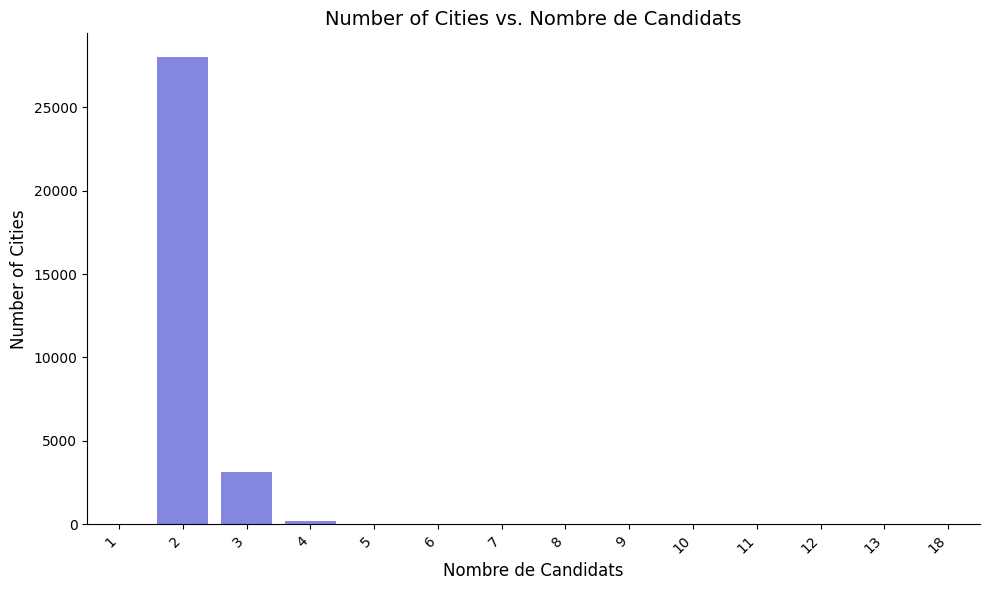

In [11]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x="Nombre_candidats", y="Number_of_Cities", data=count_by_candidates, color='#7678ED') 
plt.xlabel('Nombre de Candidats', fontsize=12)
plt.ylabel('Number of Cities', fontsize=12)
plt.title('Number of Cities vs. Nombre de Candidats', fontsize=14)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Customize the appearance (optional)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

plt.show()


## The most second turn confrontations that happen are either duels or triangles followed by 4 candidates

In [12]:
df[df["Nombre_candidats"] > 7]

,Code_département,Libellé_département,Code_commune,Libellé_commune,Inscrits,Votants,Pourcentage_Votants,Abstentions,Pourcentage_Abstentions,Exprimés,...,Numéro_de_panneau_18,Nuance_candidat_18,Nom_candidat_18,Prénom_candidat_18,Sexe_candidat_18,Voix_18,Pourcentage_Voix/inscrits_18,Pourcentage_Voix/exprimés_18,Elu_18,Nombre_candidats
3167,13,Bouches-du-Rhône,13055,Marseille,400366,258783,64.64,141583,35.36,242247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,10
10580,31,Haute-Garonne,31555,Toulouse,196238,135652,69.13,60586,30.87,132891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12
11133,33,Gironde,33063,Bordeaux,166625,114734,68.86,51891,31.14,110547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,8
11688,34,Hérault,34172,Montpellier,101456,64608,63.68,36848,36.32,60348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,8
12063,35,Ille-et-Vilaine,35238,Rennes,68957,48070,69.71,20887,30.29,47211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,9
14964,44,Loire-Atlantique,44109,Nantes,106987,73390,68.60,33597,31.40,71985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12
16184,49,Maine-et-Loire,49007,Angers,93562,62424,66.72,31138,33.28,60815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,11
17221,51,Marne,51454,Reims,101169,59940,59.25,41229,40.75,57011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,8
20039,59,Nord,59350,Lille,122500,81459,66.50,41041,33.50,77341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,13
21539,63,Puy-de-Dôme,63113,Clermont-Ferrand,73641,47958,65.12,25683,34.88,46696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,8


## In the biggest cities in France happen multiple confrontations because these cities are cut in different areas called circonscriptions for the elections

## Add the region column

In [13]:
# Use mapping to add the regions of the departement
departements_regions = {
    "01": "Auvergne-Rhône-Alpes",
    "02": "Hauts-de-France",
    "03": "Auvergne-Rhône-Alpes",
    "04": "Provence-Alpes-Côte d'Azur",
    "05": "Provence-Alpes-Côte d'Azur",
    "06": "Provence-Alpes-Côte d'Azur",
    "07": "Auvergne-Rhône-Alpes",
    "08": "Grand Est",
    "09": "Occitanie",
    "10": "Grand Est",
    "11": "Occitanie",
    "12": "Occitanie",
    "13": "Provence-Alpes-Côte d'Azur",
    "14": "Normandie",
    "15": "Auvergne-Rhône-Alpes",
    "16": "Nouvelle-Aquitaine",
    "17": "Nouvelle-Aquitaine",
    "18": "Centre-Val de Loire",
    "19": "Nouvelle-Aquitaine",
    "2A": "Corse",
    "2B": "Corse",
    "21": "Bourgogne-Franche-Comté",
    "22": "Bretagne",
    "23": "Nouvelle-Aquitaine",
    "24": "Nouvelle-Aquitaine",
    "25": "Bourgogne-Franche-Comté",
    "26": "Auvergne-Rhône-Alpes",
    "27": "Normandie",
    "28": "Centre-Val de Loire",
    "29": "Bretagne",
    "30": "Occitanie",
    "31": "Occitanie",
    "32": "Occitanie",
    "33": "Nouvelle-Aquitaine",
    "34": "Occitanie",
    "35": "Bretagne",
    "36": "Centre-Val de Loire",
    "37": "Centre-Val de Loire",
    "38": "Auvergne-Rhône-Alpes",
    "39": "Bourgogne-Franche-Comté",
    "40": "Nouvelle-Aquitaine",
    "41": "Centre-Val de Loire",
    "42": "Auvergne-Rhône-Alpes",
    "43": "Auvergne-Rhône-Alpes",
    "44": "Pays de la Loire",
    "45": "Centre-Val de Loire",
    "46": "Occitanie",
    "47": "Nouvelle-Aquitaine",
    "48": "Occitanie",
    "49": "Pays de la Loire",
    "50": "Normandie",
    "51": "Grand Est",
    "52": "Grand Est",
    "53": "Pays de la Loire",
    "54": "Grand Est",
    "55": "Grand Est",
    "56": "Bretagne",
    "57": "Grand Est",
    "58": "Bourgogne-Franche-Comté",
    "59": "Hauts-de-France",
    "60": "Hauts-de-France",
    "61": "Normandie",
    "62": "Hauts-de-France",
    "63": "Auvergne-Rhône-Alpes",
    "64": "Nouvelle-Aquitaine",
    "65": "Occitanie",
    "66": "Occitanie",
    "67": "Grand Est",
    "68": "Grand Est",
    "69": "Auvergne-Rhône-Alpes",
    "70": "Bourgogne-Franche-Comté",
    "71": "Bourgogne-Franche-Comté",
    "72": "Pays de la Loire",
    "73": "Auvergne-Rhône-Alpes",
    "74": "Auvergne-Rhône-Alpes",
    "75": "Île-de-France",
    "76": "Normandie",
    "77": "Île-de-France",
    "78": "Île-de-France",
    "79": "Nouvelle-Aquitaine",
    "80": "Hauts-de-France",
    "81": "Occitanie",
    "82": "Occitanie",
    "83": "Provence-Alpes-Côte d'Azur",
    "84": "Provence-Alpes-Côte d'Azur",
    "85": "Pays de la Loire",
    "86": "Nouvelle-Aquitaine",
    "87": "Nouvelle-Aquitaine",
    "88": "Grand Est",
    "89": "Bourgogne-Franche-Comté",
    "90": "Bourgogne-Franche-Comté",
    "91": "Île-de-France",
    "92": "Île-de-France",
    "93": "Île-de-France",
    "94": "Île-de-France",
    "95": "Île-de-France",
    "971": "Outre-Mer",
    "972": "Outre-Mer",
    "973": "Outre-Mer",
    "974": "Outre-Mer",
    "975": "Outre-Mer",
    "976": "Outre-Mer",
    "987": "Outre-Mer",
    "988": "Outre-Mer",
    "ZX": "Outre-Mer",
    "ZZ": "Étranger",  
}

In [14]:
# Adding a "0" value before the one digit numbers
df["Code_département"] = df["Code_département"].astype(str).apply(lambda x: "0" + x if len(x) == 1 else x)

In [15]:
uniques_departements = df["Code_département"].unique()
print(uniques_departements)

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69'
 '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83'
 '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '971' '972'
 '973' '974' '975' '976' '987' '988' 'ZX' 'ZZ']


In [16]:
# Making sure there is no missing keys in the mapping dictionnary

missing_keys = []

for departement in uniques_departements:
    # Convert integer departments to strings with leading zeros if necessary
    if departement not in departements_regions:
        missing_keys.append(departement)

print("Missing keys:", missing_keys)

Missing keys: []


In [17]:
# Create the new Region column with mapping
df['Libellé_Région'] = df['Code_département'].map(departements_regions)

In [18]:
unique_regions = df['Libellé_Région'].unique()

In [19]:
unique_regions

array(['Auvergne-Rhône-Alpes', 'Hauts-de-France',
       "Provence-Alpes-Côte d'Azur", 'Grand Est', 'Occitanie',
       'Normandie', 'Nouvelle-Aquitaine', 'Centre-Val de Loire',
       'Bourgogne-Franche-Comté', 'Bretagne', 'Corse', 'Pays de la Loire',
       'Île-de-France', 'Outre-Mer', 'Étranger'], dtype=object)

## Check duplicates in the dataset


In [20]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

## Check the data types of the columns

In [21]:
#Check data types
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31392 entries, 0 to 31391
Data columns (total 182 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Code_département               31392 non-null  object 
 1    Libellé_département            31392 non-null  object 
 2    Code_commune                   31392 non-null  object 
 3    Libellé_commune                31392 non-null  object 
 4    Inscrits                       31392 non-null  int64  
 5    Votants                        31392 non-null  int64  
 6    Pourcentage_Votants            31392 non-null  float64
 7    Abstentions                    31392 non-null  int64  
 8    Pourcentage_Abstentions        31392 non-null  float64
 9    Exprimés                       31392 non-null  int64  
 10   Pourcentage_Exprimés/inscrits  31392 non-null  float64
 11   Pourcentage_Exprimés/votants   31392 non-null  float64
 12   Blancs                        

## Check number of unique values

In [22]:
# Check number of unique values
list_unique = df.nunique()

## Important statistics on the numerical features of the dataset

In [23]:
df.describe()

,Inscrits,Votants,Pourcentage_Votants,Abstentions,Pourcentage_Abstentions,Exprimés,Pourcentage_Exprimés/inscrits,Pourcentage_Exprimés/votants,Blancs,Pourcentage_Blancs/inscrits,...,Pourcentage_Voix/exprimés_16,Numéro_de_panneau_17,Voix_17,Pourcentage_Voix/inscrits_17,Pourcentage_Voix/exprimés_17,Numéro_de_panneau_18,Voix_18,Pourcentage_Voix/inscrits_18,Pourcentage_Voix/exprimés_18,Nombre_candidats
count,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,...,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.00,1.0,31392.000000
mean,1380.240443,919.589673,72.605132,460.650771,27.394905,869.002071,68.256304,94.006233,38.069859,3.215389,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,2.117482
std,6682.696414,4331.296619,7.253418,2445.147631,7.253402,4114.293203,7.324949,3.952343,181.590414,2.377227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.391799
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,1.000000
25%,169.000000,125.000000,69.130000,42.000000,23.290000,117.000000,64.540000,92.150000,4.000000,1.660000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,2.000000
50%,376.000000,272.000000,72.940000,100.000000,27.060000,255.000000,68.515000,94.830000,11.000000,2.700000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,2.000000
75%,935.000000,666.250000,76.710000,263.250000,30.870000,628.000000,72.470000,96.610000,28.000000,4.270000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,2.000000
max,687417.000000,459856.000000,100.000000,227561.000000,100.000000,435557.000000,100.000000,100.000000,18628.000000,46.150000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,18.000000


## There are a lot of things that can be extracted from the statistics but we will take it features by features

## But this could be interesting is to visualize statistics about the genders in the candidates

# EDA for gender and party statistics (univariate analysis):


### First we have to get all the unique candidates

There are suppose to be: 1094 unique candidates in the second tour of this election according to the official website: https://www.vie-publique.fr/en-bref/294804-legislatives-2024-second-tour-les-6-et-7-juillet

In [25]:
# Create a new temporary dataset to store the values we wanna proceed in the analysis
df_unique_candidates = pd.concat([
                                 df['Nom_candidat_' + str(i)] + ' ' + 
                                 df['Prénom_candidat_' + str(i)] + '#' +
                                 df['Sexe_candidat_' + str(i)] + '#' +
                                 df['Nuance_candidat_' + str(i)] + '#' +
                                 df['Elu_' + str(i)].astype(str) + '#' + 
                                 df['Libellé_Région'] + '#' +
                                 df['Libellé_département'] + '#' +
                                 df['Libellé_commune']
                                 
                                 for i in range(1, 19)], ignore_index=True)

# Drop any NaN values
df_unique_candidates.dropna(inplace=True)

# Split the combined data and keep only 'Nom_complet' and 'Sexe'
df_unique_candidates = df_unique_candidates.str.split('#', expand=True)
df_unique_candidates.columns = ['Nom_complet', 'Sexe', 'Nuance', 'Elu', 'Région', 'Département', 'Commune']

# Count unique values considering Nom_complet and Sexe
unique_candidate_count = df_unique_candidates.drop_duplicates().shape[0] 

# Check if the number of candidates match the reality
print("Number of unique candidates (with gender):", unique_candidate_count)

Number of unique candidates (with gender): 66472


In [29]:
drop_with = ['Nom_complet', 'Sexe', 'Nuance', 'Elu', 'Région']
df_unique_candidates = df_unique_candidates.drop_duplicates(drop_with)

In [30]:
df_unique_candidates.reset_index(drop=True, inplace=True)

## New dataset with the unique second round candidates

In [31]:
df_unique_candidates.head(10)

,Nom_complet,Sexe,Nuance,Elu,Région,Département,Commune
0,COQUELET Christophe,MASCULIN,ENS,False,Auvergne-Rhône-Alpes,Ain,L'Abergement-Clémenciat
1,PISANI Florence,FEMININ,UG,False,Auvergne-Rhône-Alpes,Ain,L'Abergement-de-Varey
2,GIVERNET Olga,FEMININ,ENS,True,Auvergne-Rhône-Alpes,Ain,Ambléon
3,KOTARAC Andréa,MASCULIN,RN,False,Auvergne-Rhône-Alpes,Ain,Ambutrix
4,MAÎTRE Christophe,MASCULIN,RN,False,Auvergne-Rhône-Alpes,Ain,Arbigny
5,DIVE Julien,MASCULIN,LR,True,Hauts-de-France,Aisne,Alaincourt
6,RAY Nicolas,MASCULIN,LR,True,Auvergne-Rhône-Alpes,Allier,Abrest
7,MONNET Yannick,MASCULIN,UG,True,Auvergne-Rhône-Alpes,Allier,Agonges
8,BOVET Jorys,MASCULIN,RN,True,Auvergne-Rhône-Alpes,Allier,Ainay-le-Château
9,GIRARD Christian,MASCULIN,RN,True,Provence-Alpes-Côte d'Azur,Alpes-de-Haute-Provence,Aiglun


## Plot of the gender count and distribution

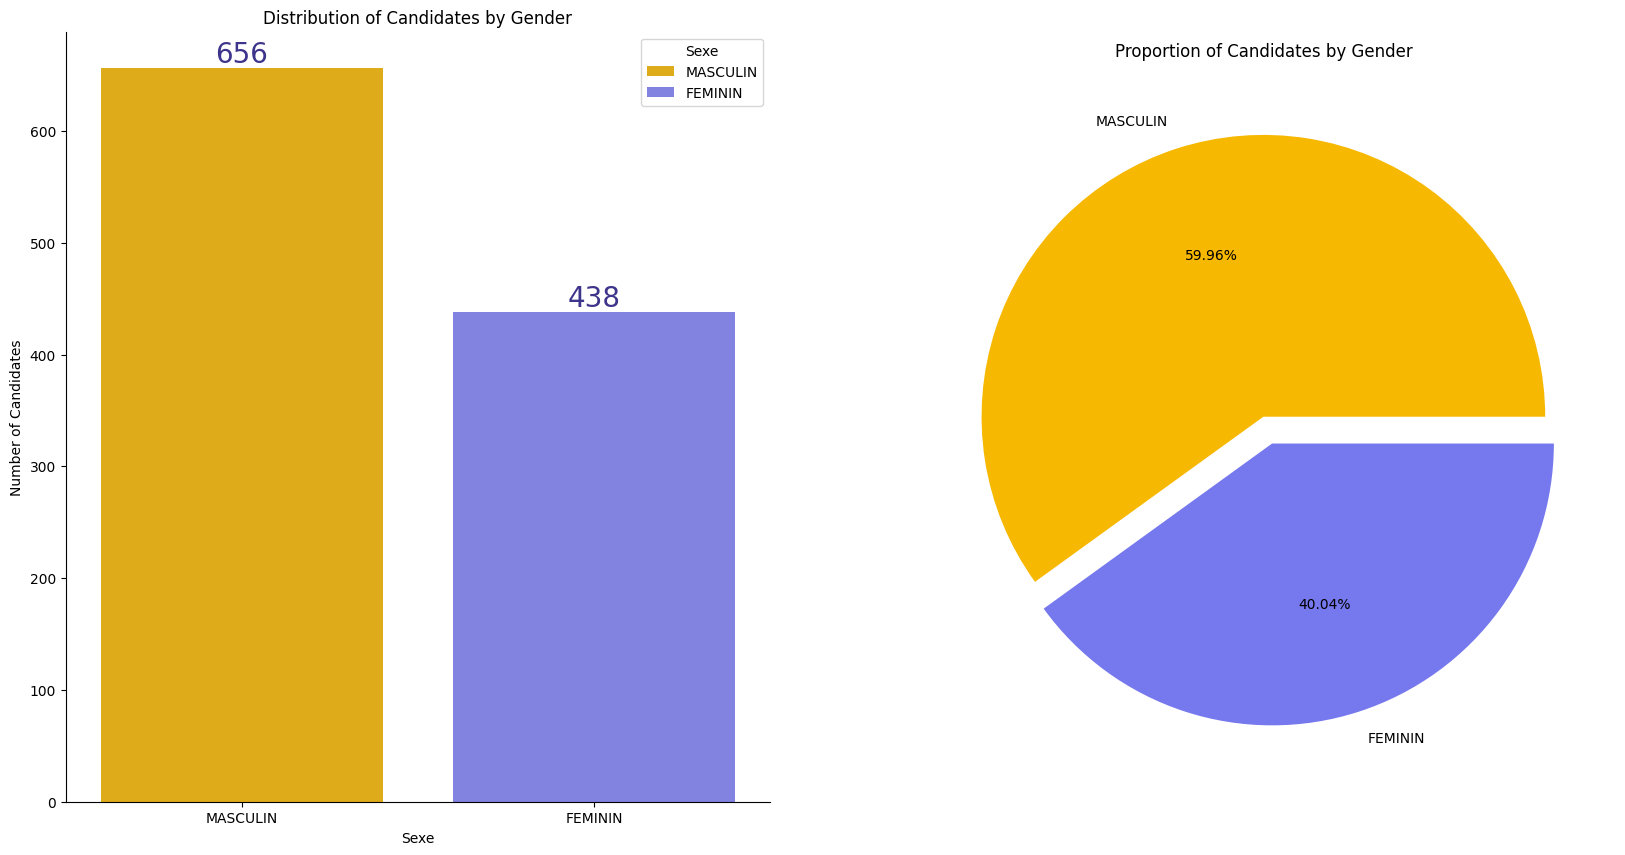

In [29]:
labels = ["MASCULIN", "FEMININ"]

f, ax =plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df_unique_candidates['Sexe'], data=df_unique_candidates, hue="Sexe", palette ={'MASCULIN': '#f7b801', 'FEMININ': '#7678ed'}, ax=ax[0], saturation=0.8, stat="count", legend="full")
for container in ax[0].containers:
    ax[0].bar_label(container, color=(61/255, 52/255, 139/255), size=20) 
# Set title for the first subplot
ax[0].set_title("Distribution of Candidates by Gender")
ax[0].set_ylabel("Number of Candidates") 
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].spines['left'].set_visible(True)

plt.title("Proportion of Candidates by Gender")
plt.pie(x=df_unique_candidates['Sexe'].value_counts(),labels=labels, explode=[0,0.1], autopct='%2.2f%%', colors =['#f7b801', '#7678ed'])
plt.show()

## Mapping the political tendencies of every parties at the second round of the election

In [30]:
# Create a mapping for the tendency of all the parties from Gauche Radicale to Extrême Droite
tendency_mapping = {
    "ENS": "Centre-Droite",
    "UG": "Gauche",
    "RN": "Extrême-Droite",
    "LR": "Droite",
    "UXD": "Extrême-Droite",
    "DVD": "Droite",
    "HOR": "Centre-Droite",
    "DVC": "Centre",
    "REG": "Autres",
    "EXD": "Extrême-Droite",
    "DIV": "Autres",
    "ECO": "Gauche-Radicale",
    "DVG": "Gauche",
    "UDI": "Droite",
    "SOC": "Gauche",
    "DSV": "Extrême-Droite",
    "FI": "Gauche-Radicale"  
}

In [31]:
# Making sure there is no missing keys in the mapping dictionnary
missing_keys = []

for party in tendency_mapping:
    # Convert integer departments to strings with leading zeros if necessary
    if party not in tendency_mapping:
        missing_keys.append(party)

print("Missing keys:", missing_keys)

Missing keys: []


In [32]:
# Create the new Region column with mapping
df_unique_candidates['Tendency'] = df_unique_candidates['Nuance'].map(tendency_mapping)

In [33]:
df_unique_candidates.to_csv("../Clean_Data/2024/candidates_legislative_2024.csv", sep=";", header=True, index=False)

In [34]:
df_unique_candidates.head(20)

,Nom_complet,Sexe,Nuance,Elu,Région,Tendency
0,COQUELET Christophe,MASCULIN,ENS,False,Auvergne-Rhône-Alpes,Centre-Droite
1,PISANI Florence,FEMININ,UG,False,Auvergne-Rhône-Alpes,Gauche
2,GIVERNET Olga,FEMININ,ENS,True,Auvergne-Rhône-Alpes,Centre-Droite
3,KOTARAC Andréa,MASCULIN,RN,False,Auvergne-Rhône-Alpes,Extrême-Droite
4,MAÎTRE Christophe,MASCULIN,RN,False,Auvergne-Rhône-Alpes,Extrême-Droite
5,DIVE Julien,MASCULIN,LR,True,Hauts-de-France,Droite
6,RAY Nicolas,MASCULIN,LR,True,Auvergne-Rhône-Alpes,Droite
7,MONNET Yannick,MASCULIN,UG,True,Auvergne-Rhône-Alpes,Gauche
8,BOVET Jorys,MASCULIN,RN,True,Auvergne-Rhône-Alpes,Extrême-Droite
9,GIRARD Christian,MASCULIN,RN,True,Provence-Alpes-Côte d'Azur,Extrême-Droite


In [35]:
total_candidates = df_unique_candidates["Nom_complet"].value_counts().sum()

In [36]:
tendency_count = df_unique_candidates["Tendency"].value_counts()

In [37]:
tendency_count

Tendency
Extrême-Droite     443
Gauche             300
Centre-Droite      227
Droite              99
Autres              14
Centre               9
Gauche-Radicale      2
Name: count, dtype: int64

In [38]:
tendencies_plot_order = ['Gauche-Radicale','Gauche', 'Centre', 'Centre-Droite', 'Droite', 'Extrême-Droite', 'Autres']
# Create a new column to store the order based on the political spectrum
tendency_count['map'] = tendency_count.index.map(lambda x: tendencies_plot_order.index(x) if x in tendencies_plot_order else -1)


In [39]:
tendency_count = pd.DataFrame(df_unique_candidates).set_index('Tendency') # Keep as DataFrame

# ... rest of your code (color palette, tendencies_plot_order) ...

# Create a categorical column with the desired order
tendency_count['Tendency_Cat'] = pd.Categorical(tendency_count.index, categories=tendencies_plot_order, ordered=True)

# Sort the DataFrame based on the categorical column
tendency_count = tendency_count.sort_values('Tendency_Cat') 

In [40]:
tendency_count

,Nom_complet,Sexe,Nuance,Elu,Région,Tendency_Cat
Tendency,,,,,,
Gauche-Radicale,AWAD Mohamed,MASCULIN,FI,False,Île-de-France,Gauche-Radicale
Gauche-Radicale,BATHO Delphine,FEMININ,ECO,True,Nouvelle-Aquitaine,Gauche-Radicale
Gauche,HOLLANDE François,MASCULIN,UG,True,Nouvelle-Aquitaine,Gauche
Gauche,FALORNI Olivier,MASCULIN,DVG,True,Nouvelle-Aquitaine,Gauche
Gauche,BARUSSEAU Fabrice,MASCULIN,UG,True,Nouvelle-Aquitaine,Gauche
...,...,...,...,...,...,...
Autres,EDMOND-MARIETTE Philippe,MASCULIN,REG,False,Outre-Mer,Autres
Autres,CASTOR Jean-Victor,MASCULIN,REG,True,Outre-Mer,Autres
Autres,RIMANE Davy,MASCULIN,REG,True,Outre-Mer,Autres


In [41]:
tendency_count = df_unique_candidates["Tendency"].value_counts()

In [42]:
tendency_count

Tendency
Extrême-Droite     443
Gauche             300
Centre-Droite      227
Droite              99
Autres              14
Centre               9
Gauche-Radicale      2
Name: count, dtype: int64

In [43]:
total_candidates

np.int64(1094)

In [44]:
labels = []
for nuance in tendency_mapping:
    if nuance not in labels:
        labels.append(nuance)

In [45]:
labels

['ENS',
 'UG',
 'RN',
 'LR',
 'UXD',
 'DVD',
 'HOR',
 'DVC',
 'REG',
 'EXD',
 'DIV',
 'ECO',
 'DVG',
 'UDI',
 'SOC',
 'DSV',
 'FI']

## Plotting the count of the candidates in each political parties and their tendencies

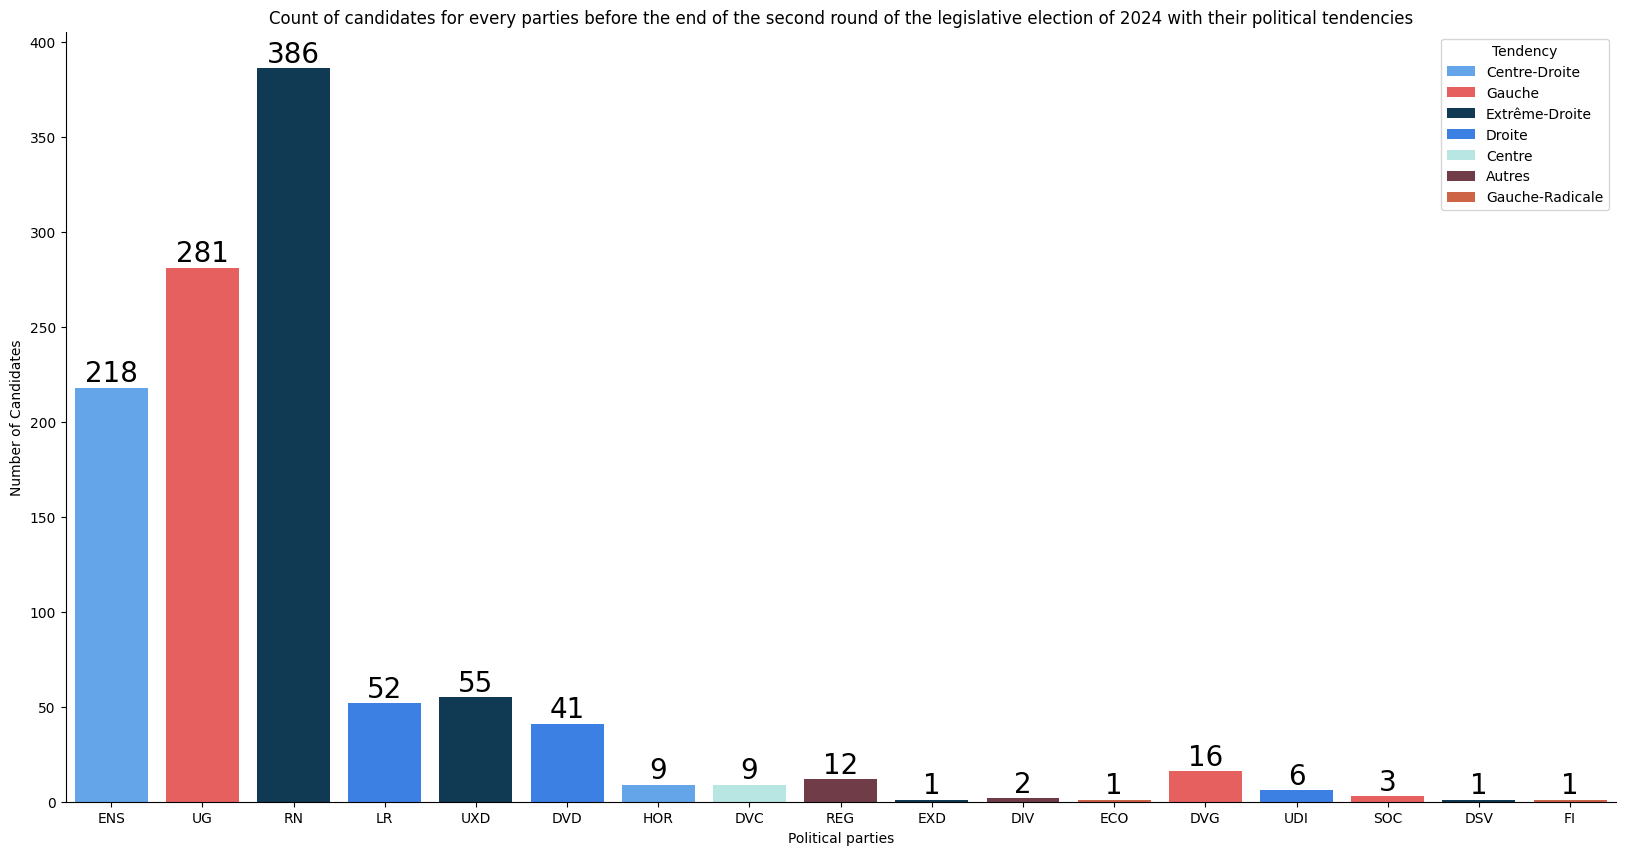

In [46]:
palette = {'Gauche-Radicale': '#e4572e', 'Gauche': '#fe4a49', "Centre": "#b1ede8", "Centre-Droite": "#4ea5ff", "Droite": "#207bff", "Extrême-Droite":"#053c5e", "Autres": "#773344"}

plt.figure(figsize=(20, 10))  # Adjust size as needed

sns.countplot(x=df_unique_candidates['Nuance'], hue="Tendency", data=df_unique_candidates, palette=palette, stat="count", legend="full")
ax = plt.gca()  # Get the current axes
for container in ax.containers:
    ax.bar_label(container, size=20)

# Set title and labels
ax.set_title("Count of candidates for every parties before the end of the second round of the legislative election of 2024 with their political tendencies")
ax.set_ylabel("Number of Candidates")
ax.set_xlabel("Political parties")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.show()

In [47]:
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [48]:
import plotly.express as px

palette = {'Gauche-Radicale': '#e4572e', 'Gauche': '#fe4a49', "Centre": "#b1ede8", "Centre-Droite": "#4ea5ff", "Droite": "#207bff", "Extrême-Droite":"#053c5e", "Autres": "#773344"}

fig = px.histogram(df_unique_candidates, 
                   x="Nuance", 
                   color="Tendency", 
                   color_discrete_map=palette,
                   title="Count of candidates for every parties before the end of the second round of the legislative election of 2024 with their political tendencies")

# Customize layout
fig.update_layout(
    xaxis_title="Political parties",
    yaxis_title="Number of Candidates",
    showlegend=True,
    plot_bgcolor='white'  # Set background color to white
)

# Add text annotations for counts
fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

In [49]:
df_unique_candidates.head(10)

,Nom_complet,Sexe,Nuance,Elu,Région,Tendency
0,COQUELET Christophe,MASCULIN,ENS,False,Auvergne-Rhône-Alpes,Centre-Droite
1,PISANI Florence,FEMININ,UG,False,Auvergne-Rhône-Alpes,Gauche
2,GIVERNET Olga,FEMININ,ENS,True,Auvergne-Rhône-Alpes,Centre-Droite
3,KOTARAC Andréa,MASCULIN,RN,False,Auvergne-Rhône-Alpes,Extrême-Droite
4,MAÎTRE Christophe,MASCULIN,RN,False,Auvergne-Rhône-Alpes,Extrême-Droite
5,DIVE Julien,MASCULIN,LR,True,Hauts-de-France,Droite
6,RAY Nicolas,MASCULIN,LR,True,Auvergne-Rhône-Alpes,Droite
7,MONNET Yannick,MASCULIN,UG,True,Auvergne-Rhône-Alpes,Gauche
8,BOVET Jorys,MASCULIN,RN,True,Auvergne-Rhône-Alpes,Extrême-Droite
9,GIRARD Christian,MASCULIN,RN,True,Provence-Alpes-Côte d'Azur,Extrême-Droite


In [50]:
tendency_by_gender = df_unique_candidates.groupby('Sexe')['Nuance',].value_counts().unstack(fill_value=0)

tendency_by_gender.head()

Nuance,DIV,DSV,DVC,DVD,DVG,ECO,ENS,EXD,FI,HOR,LR,REG,RN,SOC,UDI,UG,UXD
Sexe,,,,,,,,,,,,,,,,,
FEMININ,0,0,1,9,3,1,90,0,0,4,15,1,171,1,3,131,8
MASCULIN,2,1,8,32,13,0,128,1,1,5,37,11,215,2,3,150,47


# EDA for voting statistics (Multivariate analysis):

In [51]:
df.head(5)

,Code_département,Libellé_département,Code_commune,Libellé_commune,Inscrits,Votants,Pourcentage_Votants,Abstentions,Pourcentage_Abstentions,Exprimés,...,Nuance_candidat_18,Nom_candidat_18,Prénom_candidat_18,Sexe_candidat_18,Voix_18,Pourcentage_Voix/inscrits_18,Pourcentage_Voix/exprimés_18,Elu_18,Nombre_candidats,Libellé_Région
0,01,Ain,1001,L'Abergement-Clémenciat,662,494,74.62,168,25.38,476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
1,01,Ain,1002,L'Abergement-de-Varey,228,187,82.02,41,17.98,166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
2,01,Ain,1004,Ambérieu-en-Bugey,8745,5887,67.32,2858,32.68,5348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
3,01,Ain,1005,Ambérieux-en-Dombes,1337,979,73.22,358,26.78,926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
4,01,Ain,1006,Ambléon,98,65,66.33,33,33.67,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes


## Create a new temporary dataset that stores the information of the number of abstainers in the second round per region

In [52]:
abstention_per_region = df.groupby("Libellé_Région").agg(
    Abstention= ("Pourcentage_Abstentions", "mean"),
).reset_index()

In [53]:
abstention_per_region.head(15)

,Libellé_Région,Abstention
0,Auvergne-Rhône-Alpes,25.850904
1,Bourgogne-Franche-Comté,25.628531
2,Bretagne,26.240200
3,Centre-Val de Loire,28.454334
4,Corse,28.989028
5,Grand Est,28.102320
6,Hauts-de-France,29.121121
7,Normandie,28.154747
8,Nouvelle-Aquitaine,26.371415
9,Occitanie,24.519403


## Plot of the abstention rates by region with binning 

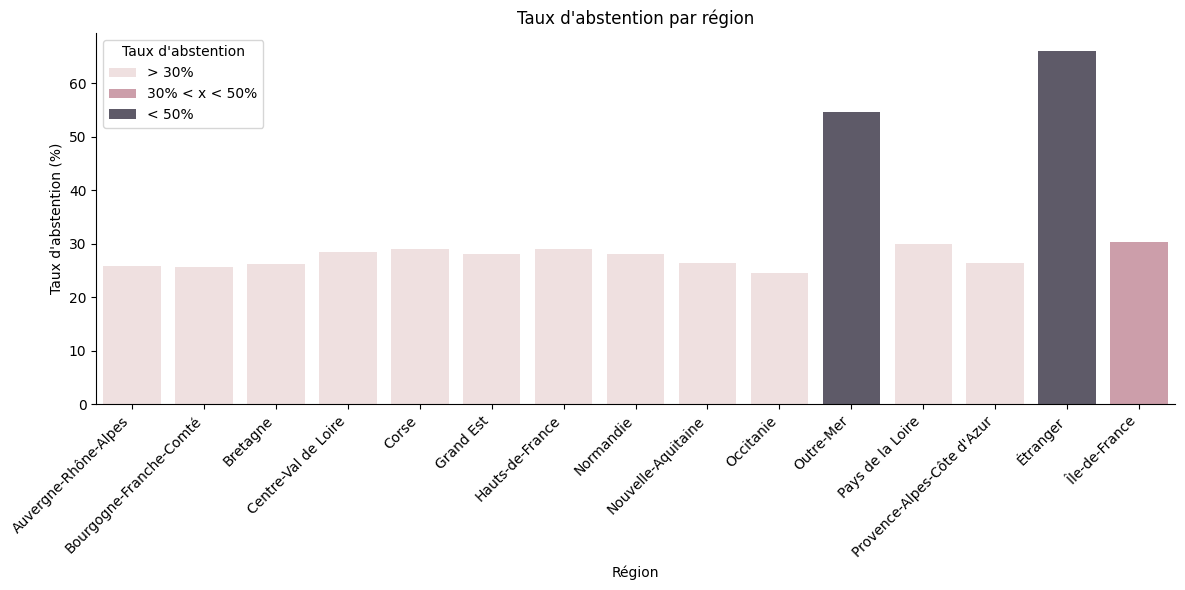

In [54]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed

# Create a new categorical variable based on value ranges
bins = [0, 30, 50, 100]
labels = ['> 30%', '30% < x < 50%', '< 50%']
abstention_per_region["Taux d'abstention"] = pd.cut(abstention_per_region['Abstention'], bins=bins, labels=labels, right=False)

# Create the barplot with 'hue'
sns.barplot(x='Libellé_Région', y='Abstention', hue="Taux d'abstention", data=abstention_per_region, palette={'> 30%': '#f1dede', '30% < x < 50%': '#d496a7', '< 50%': '#5d576b'})

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Région')
plt.ylabel('Taux d\'abstention (%)')
plt.title('Taux d\'abstention par région')

# Show the plot
plt.tight_layout()
plt.show()

## Create a new temporary dataset that stores the information of the number of voters in the second round per region

In [55]:
votants_per_region = df.groupby("Libellé_Région").agg(
    Votants= ("Pourcentage_Votants", "mean"),
).reset_index()

In [56]:
votants_per_region.head(15)

,Libellé_Région,Votants
0,Auvergne-Rhône-Alpes,74.149128
1,Bourgogne-Franche-Comté,74.371511
2,Bretagne,73.759808
3,Centre-Val de Loire,71.545683
4,Corse,71.011000
5,Grand Est,71.897726
6,Hauts-de-France,70.878913
7,Normandie,71.845290
8,Nouvelle-Aquitaine,73.628618
9,Occitanie,75.480655


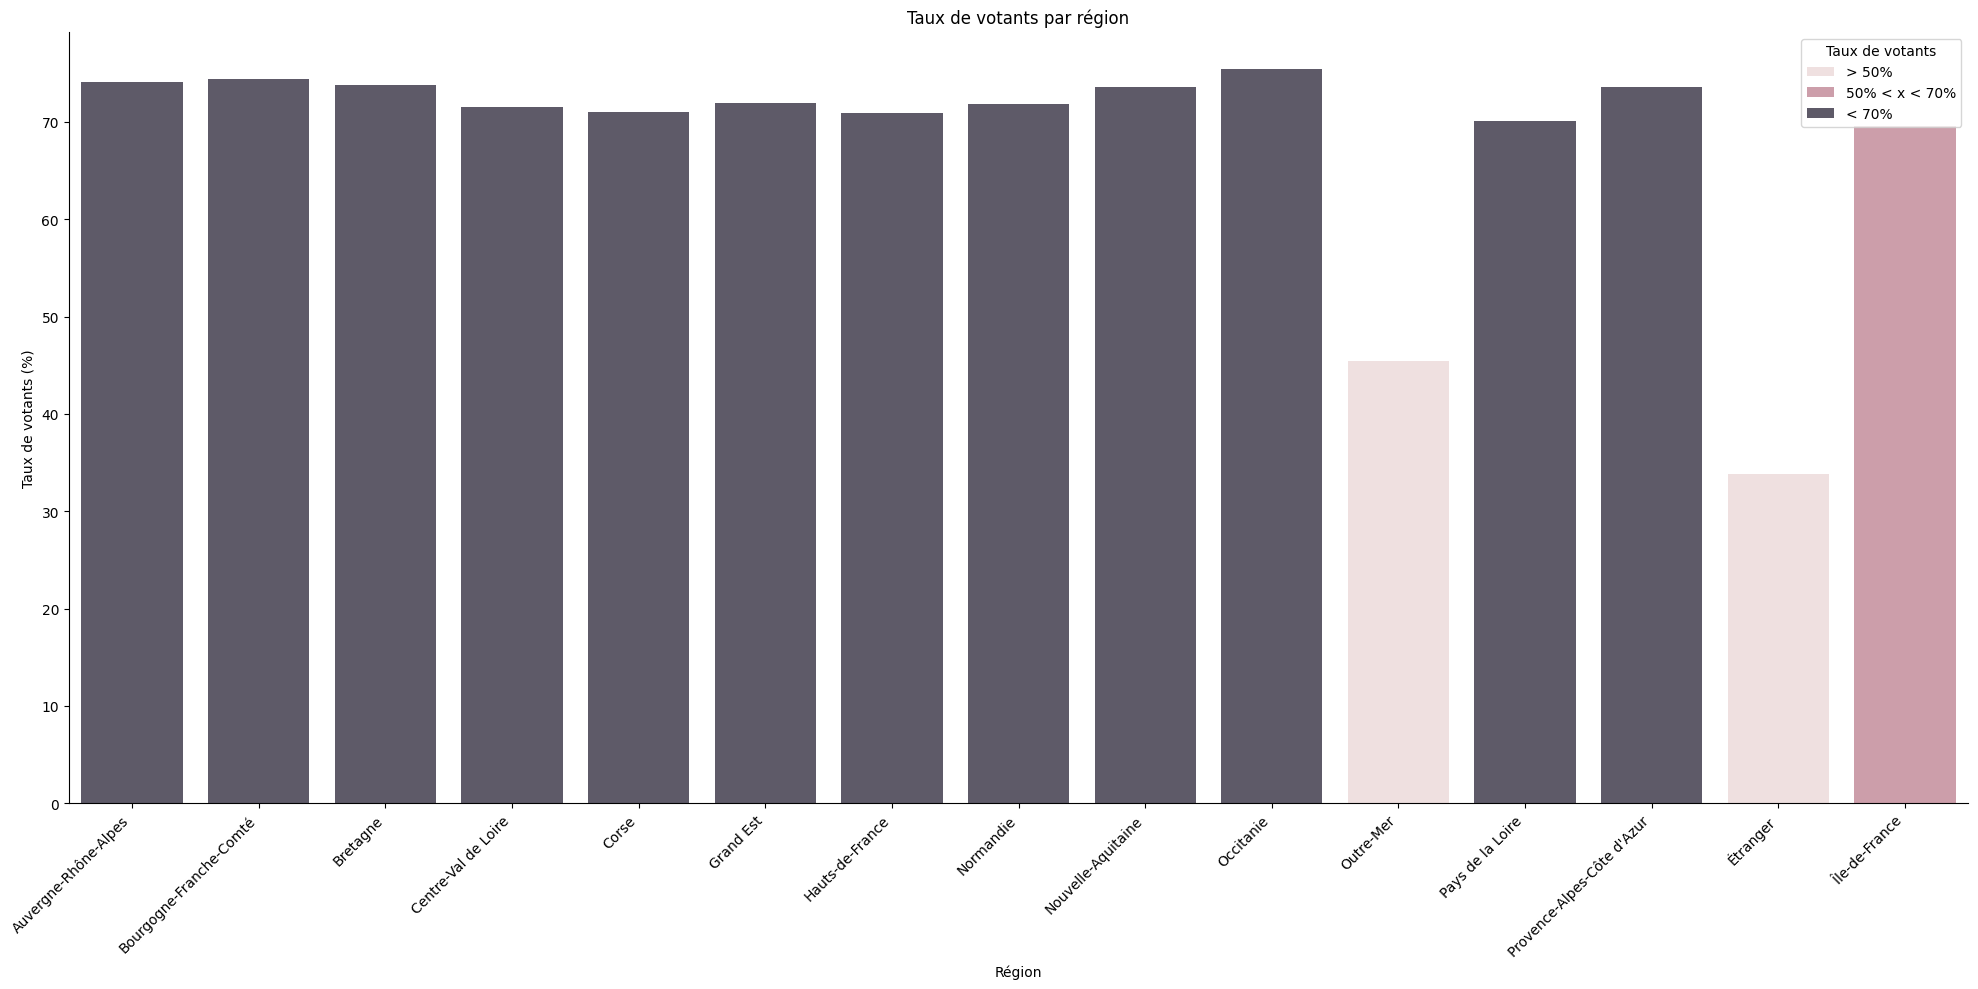

In [57]:
plt.figure(figsize=(20, 10))  # Adjust figure size if needed

# Create a new categorical variable based on value ranges
bins = [0, 50, 70, 100]
labels = ['> 50%', '50% < x < 70%', '< 70%']
votants_per_region["Taux de votants"] = pd.cut(votants_per_region['Votants'], bins=bins, labels=labels, right=False)

# Create the barplot with 'hue'
sns.barplot(x='Libellé_Région', y='Votants', hue="Taux de votants", data=votants_per_region, palette={'> 50%': '#f1dede', '50% < x < 70%': '#d496a7', '< 70%': '#5d576b'})

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Région')
plt.ylabel('Taux de votants (%)')
plt.title('Taux de votants par région')

# Show the plot
plt.tight_layout()
plt.show()

In [58]:
df_unique_candidates.head(20)

,Nom_complet,Sexe,Nuance,Elu,Région,Tendency
0,COQUELET Christophe,MASCULIN,ENS,False,Auvergne-Rhône-Alpes,Centre-Droite
1,PISANI Florence,FEMININ,UG,False,Auvergne-Rhône-Alpes,Gauche
2,GIVERNET Olga,FEMININ,ENS,True,Auvergne-Rhône-Alpes,Centre-Droite
3,KOTARAC Andréa,MASCULIN,RN,False,Auvergne-Rhône-Alpes,Extrême-Droite
4,MAÎTRE Christophe,MASCULIN,RN,False,Auvergne-Rhône-Alpes,Extrême-Droite
5,DIVE Julien,MASCULIN,LR,True,Hauts-de-France,Droite
6,RAY Nicolas,MASCULIN,LR,True,Auvergne-Rhône-Alpes,Droite
7,MONNET Yannick,MASCULIN,UG,True,Auvergne-Rhône-Alpes,Gauche
8,BOVET Jorys,MASCULIN,RN,True,Auvergne-Rhône-Alpes,Extrême-Droite
9,GIRARD Christian,MASCULIN,RN,True,Provence-Alpes-Côte d'Azur,Extrême-Droite


In [70]:
sexes = df_unique_candidates["Sexe"].unique()  # Get unique sexes
count = df_unique_candidates[(df_unique_candidates["Elu"] == "True") & (df_unique_candidates["Région"] == "Corse")].groupby(["Sexe"]).size()

# Iterate through unique sexes and check if they exist in the count
for sexe in sexes:
    if sexe not in count:
        count[sexe] = 0

print(count)

Sexe
MASCULIN    4
FEMININ     0
dtype: int64


In [65]:
df

,Nom_complet,Sexe,Nuance,Elu,Région,Tendency
2,GIVERNET Olga,FEMININ,ENS,True,Auvergne-Rhône-Alpes,Centre-Droite
5,DIVE Julien,MASCULIN,LR,True,Hauts-de-France,Droite
6,RAY Nicolas,MASCULIN,LR,True,Auvergne-Rhône-Alpes,Droite
7,MONNET Yannick,MASCULIN,UG,True,Auvergne-Rhône-Alpes,Gauche
8,BOVET Jorys,MASCULIN,RN,True,Auvergne-Rhône-Alpes,Extrême-Droite
...,...,...,...,...,...,...
1082,DAVI Hendrik,MASCULIN,DVG,True,Provence-Alpes-Côte d'Azur,Gauche
1085,MAILLARD Sylvain,MASCULIN,ENS,True,Île-de-France,Centre-Droite
1086,AMIEL David,MASCULIN,ENS,True,Île-de-France,Centre-Droite
1087,LAUSSUCQ Jean,MASCULIN,ENS,True,Île-de-France,Centre-Droite


## Multivariate analysis of the political tendencies per Region

In [59]:
# Creating the list of labels for the plot
labels = []

for tendency in tendency_mapping.values():
    if tendency not in labels:
        labels.append(tendency)

In [60]:
# Check the labels
labels

['Centre-Droite',
 'Gauche',
 'Extrême-Droite',
 'Droite',
 'Centre',
 'Autres',
 'Gauche-Radicale']

In [61]:
# Create a new dataframe with the count of candidates with their respective political tendencies per Region
tendencies_per_region = df_unique_candidates.groupby(['Région', 'Tendency']).size().reset_index(name='Count')

In [62]:
tendencies_per_region.head(10)

,Région,Tendency,Count
0,Auvergne-Rhône-Alpes,Centre-Droite,22
1,Auvergne-Rhône-Alpes,Droite,20
2,Auvergne-Rhône-Alpes,Extrême-Droite,61
3,Auvergne-Rhône-Alpes,Gauche,38
4,Bourgogne-Franche-Comté,Centre-Droite,10
5,Bourgogne-Franche-Comté,Droite,7
6,Bourgogne-Franche-Comté,Extrême-Droite,25
7,Bourgogne-Franche-Comté,Gauche,11
8,Bretagne,Autres,1
9,Bretagne,Centre,1


In [63]:
# Check for the Centre-Droite tendency
tendencies_per_region[tendencies_per_region['Tendency'] == 'Centre-Droite']['Count'].sum()

np.int64(227)

In [64]:
# Check all the tendencies
print(tendencies_per_region['Tendency'].unique())

['Centre-Droite' 'Droite' 'Extrême-Droite' 'Gauche' 'Autres' 'Centre'
 'Gauche-Radicale']


## Plot of the distribution of political tendencies per Region before the result

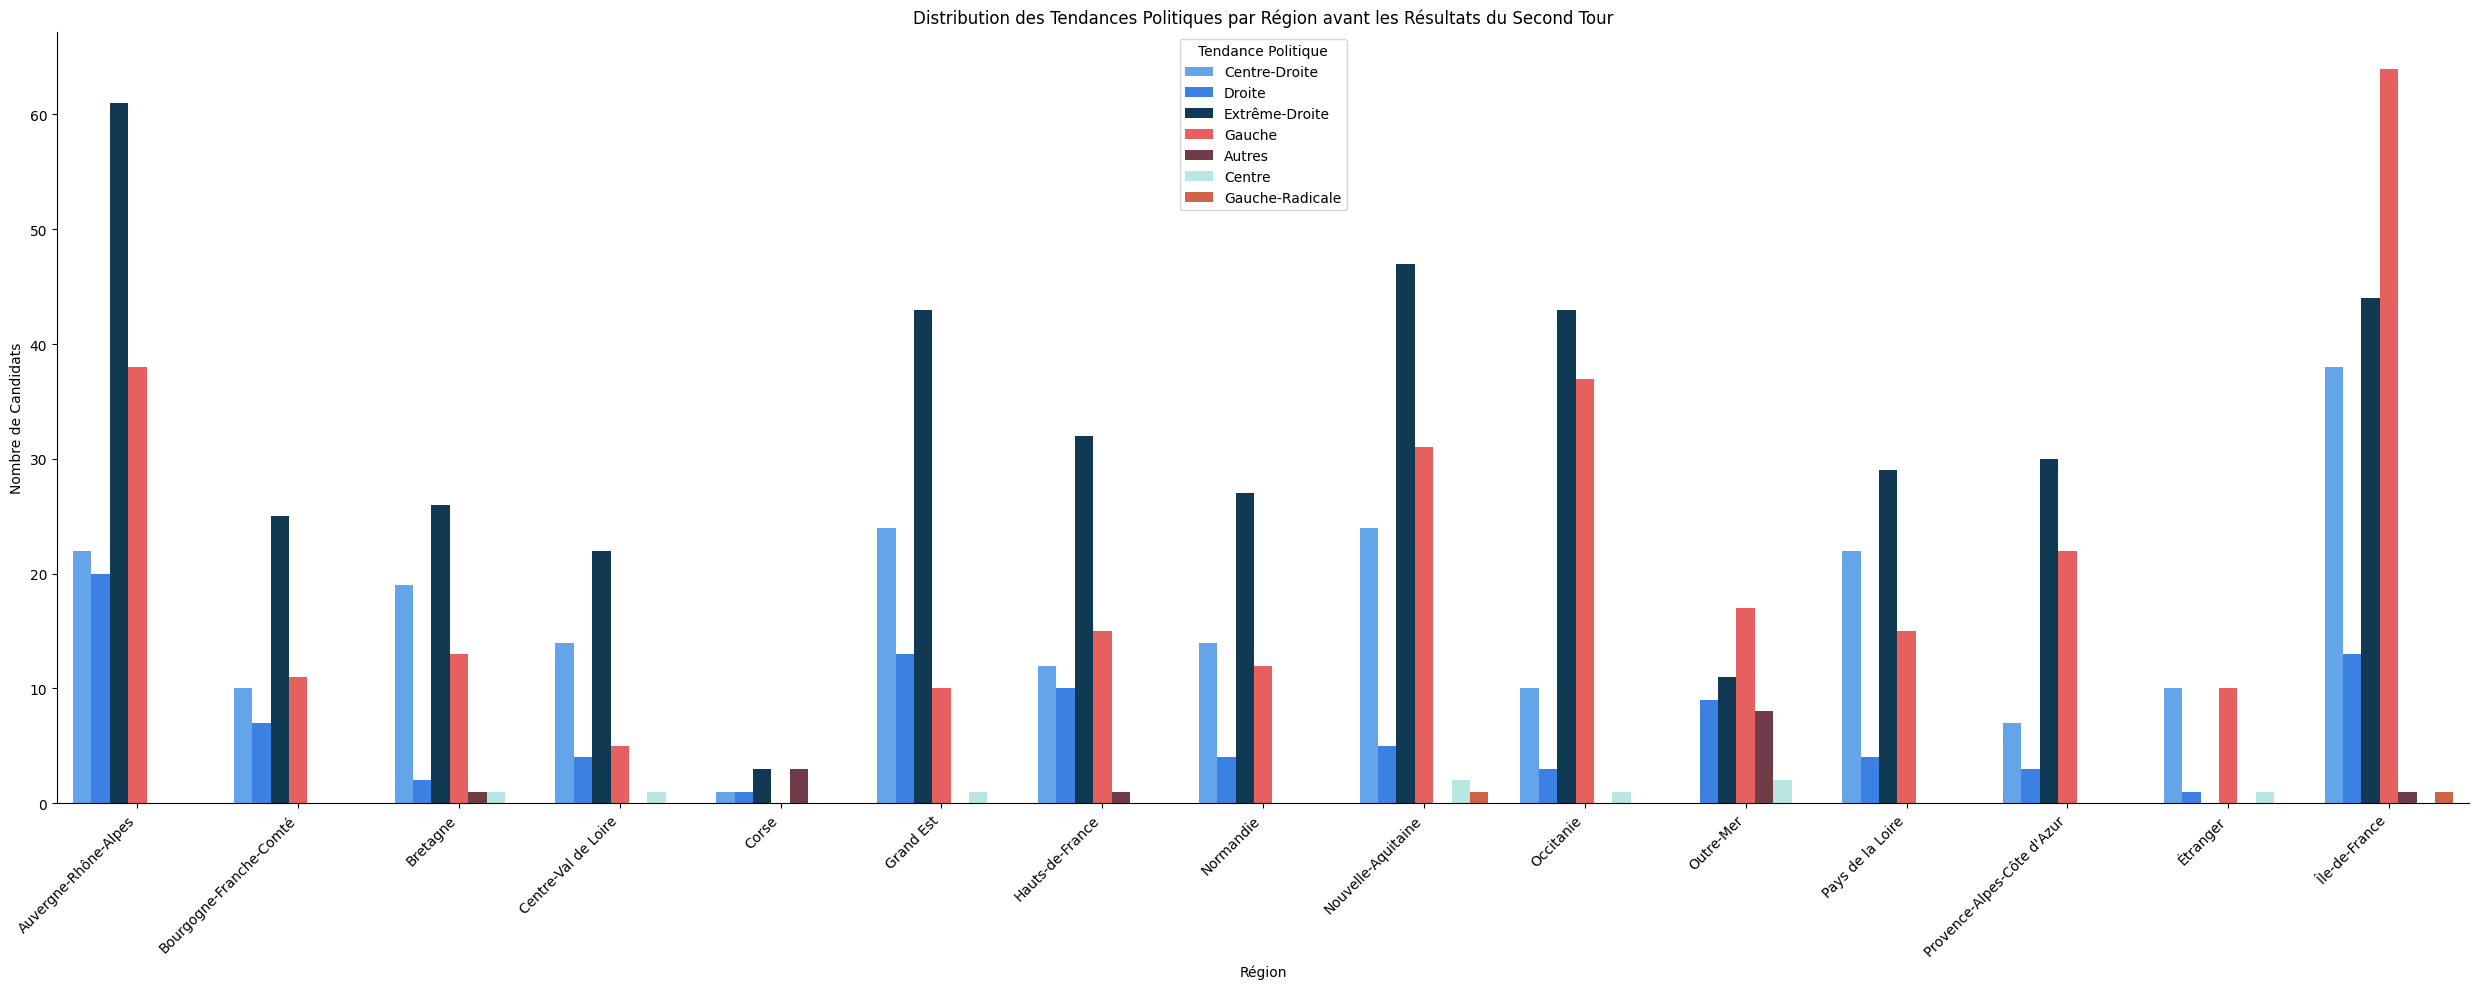

In [65]:
palette = {'Gauche-Radicale': '#e4572e', 'Gauche': '#fe4a49', "Centre": "#b1ede8", "Centre-Droite": "#4ea5ff", "Droite": "#207bff", "Extrême-Droite":"#053c5e", "Autres": "#773344"}

# Create the stacked bar plot
plt.figure(figsize=(25, 10))
sns.barplot(x='Région', y='Count', hue='Tendency', data=tendencies_per_region, dodge=True, palette=palette, legend="full")  # dodge=False for stacked bars

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Région')
plt.ylabel('Nombre de Candidats')
plt.title('Distribution des Tendances Politiques par Région avant les Résultats du Second Tour')
plt.legend(title='Tendance Politique')  # Add a legend

plt.tight_layout()
plt.show()

## Distribution of political tendencies per Region after the election

In [69]:
# We just keep the candidates elected
df_elected = df_unique_candidates[df_unique_candidates['Elu'] == "True"]

In [70]:
df_elected.head(10)

,Nom_complet,Sexe,Nuance,Elu,Région,Tendency
2,GIVERNET Olga,FEMININ,ENS,True,Auvergne-Rhône-Alpes,Centre-Droite
5,DIVE Julien,MASCULIN,LR,True,Hauts-de-France,Droite
6,RAY Nicolas,MASCULIN,LR,True,Auvergne-Rhône-Alpes,Droite
7,MONNET Yannick,MASCULIN,UG,True,Auvergne-Rhône-Alpes,Gauche
8,BOVET Jorys,MASCULIN,RN,True,Auvergne-Rhône-Alpes,Extrême-Droite
9,GIRARD Christian,MASCULIN,RN,True,Provence-Alpes-Côte d'Azur,Extrême-Droite
10,VAGINAY Sophie,FEMININ,UXD,True,Provence-Alpes-Côte d'Azur,Extrême-Droite
11,ROSSI Valérie,FEMININ,UG,True,Provence-Alpes-Côte d'Azur,Gauche
22,TERMET Flavien,MASCULIN,RN,True,Grand Est,Extrême-Droite
23,WARSMANN Jean-Luc,MASCULIN,DVD,True,Grand Est,Droite


In [68]:
tendencies_per_region_elected = df_elected.groupby(['Région', 'Tendency']).size().reset_index(name='Count')

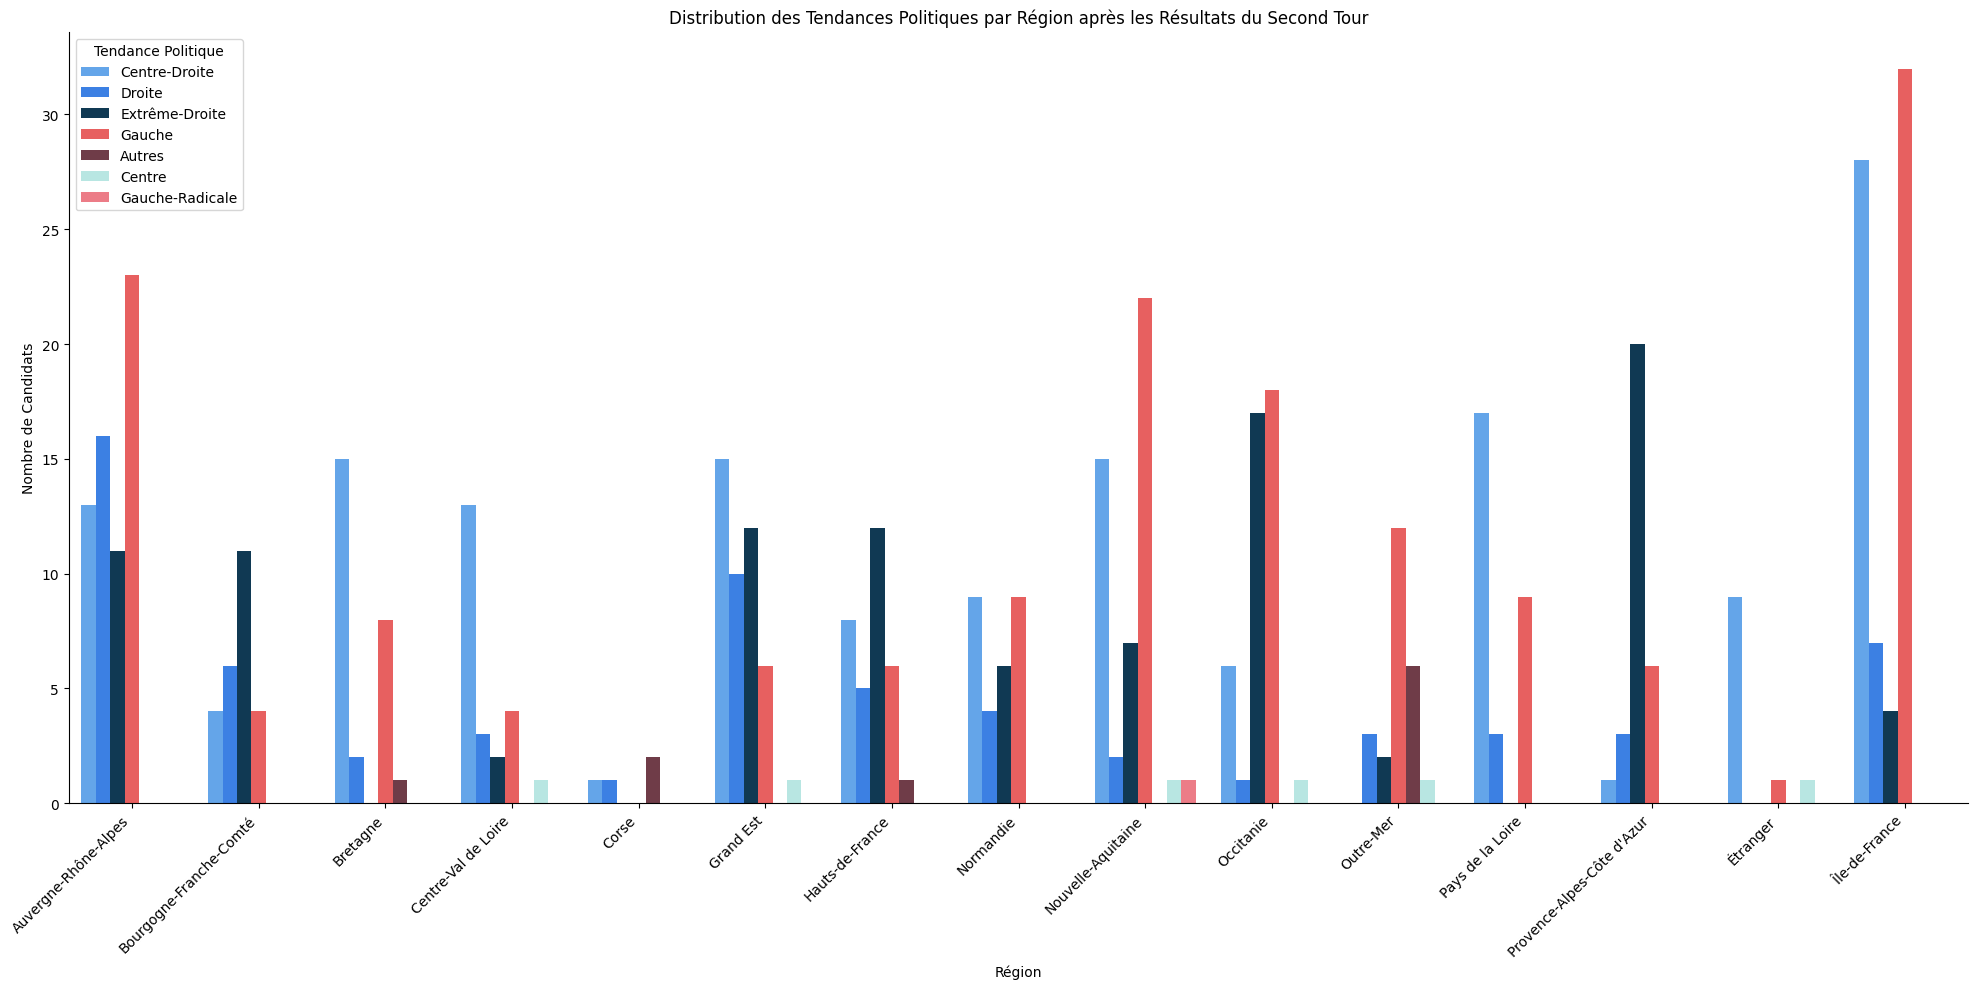

In [69]:
palette = {'Gauche-Radicale': '#ff6978', 'Gauche': '#fe4a49', "Centre": "#b1ede8", "Centre-Droite": "#4ea5ff", "Droite": "#207bff", "Extrême-Droite":"#053c5e", "Autres": "#773344"}

# Create the stacked bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x='Région', y='Count', hue='Tendency', data=tendencies_per_region_elected, dodge=True, palette=palette, legend="full")  # dodge=False for stacked bars

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Région')
plt.ylabel('Nombre de Candidats')
plt.title('Distribution des Tendances Politiques par Région après les Résultats du Second Tour')
plt.legend(title='Tendance Politique')  # Add a legend

plt.tight_layout()
plt.show()

## We can take the case of the Region Auvergne-Rhone-Alpes before and after the election day
### In this case the Extrême-Droite which was ahead didn't elect as much candidates as expected

In [70]:
tendencies_per_region_elected_ARA = tendencies_per_region_elected[tendencies_per_region_elected['Région'] == "Auvergne-Rhône-Alpes"]
tendencies_per_region_ARA = tendencies_per_region[tendencies_per_region['Région']== "Auvergne-Rhône-Alpes"]

In [71]:
tendencies_per_region_elected_ARA

,Région,Tendency,Count
0,Auvergne-Rhône-Alpes,Centre-Droite,13
1,Auvergne-Rhône-Alpes,Droite,16
2,Auvergne-Rhône-Alpes,Extrême-Droite,11
3,Auvergne-Rhône-Alpes,Gauche,23


In [72]:
tendencies_per_region_ARA

,Région,Tendency,Count
0,Auvergne-Rhône-Alpes,Centre-Droite,22
1,Auvergne-Rhône-Alpes,Droite,20
2,Auvergne-Rhône-Alpes,Extrême-Droite,61
3,Auvergne-Rhône-Alpes,Gauche,38


Text(0.5, 1.0, 'Distribution of the candidates elected at the end of the election for the Région Auvergne-Rhône-Alpes')

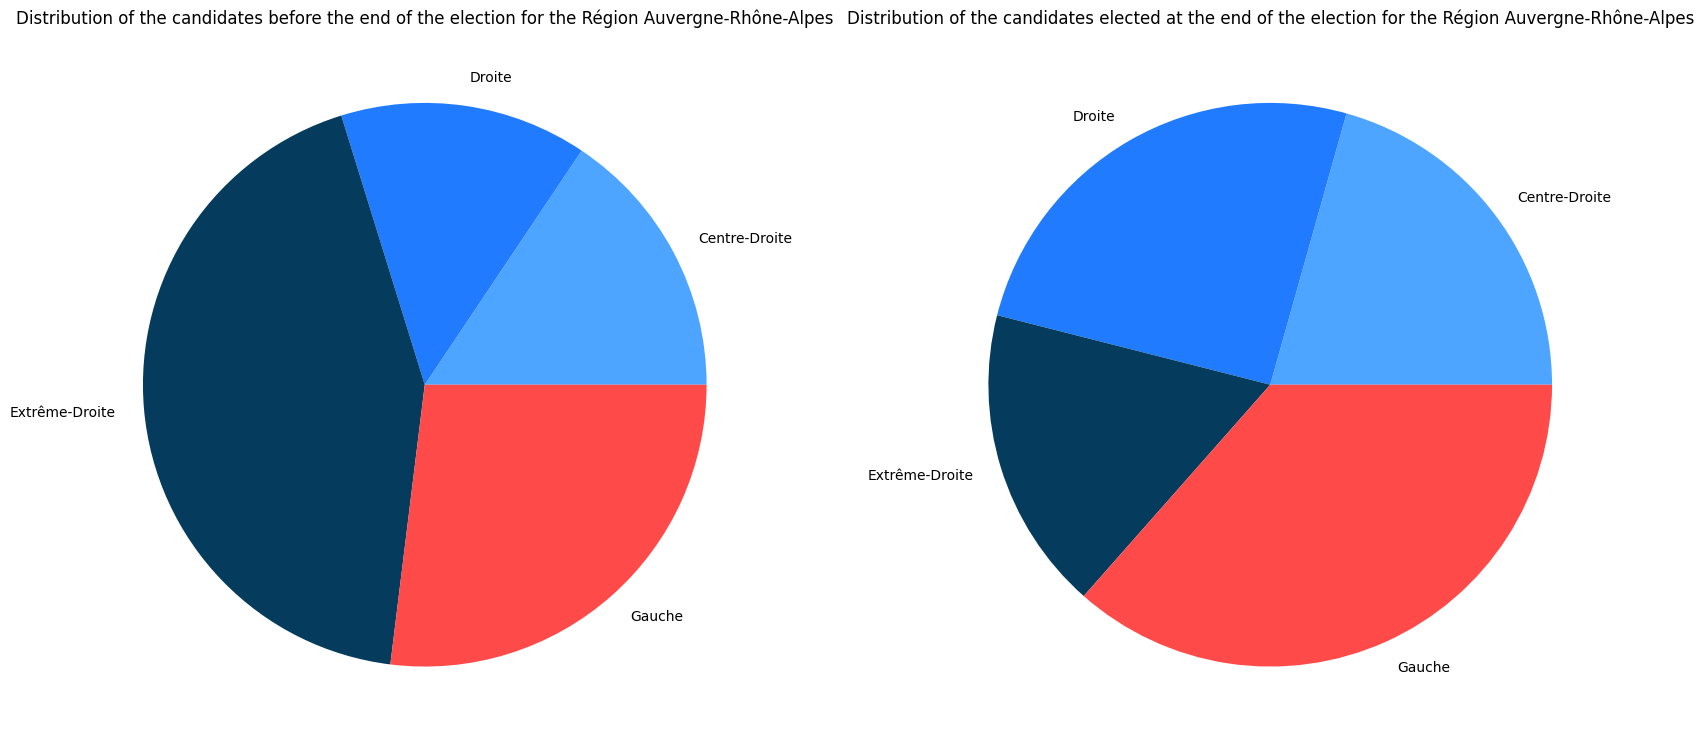

In [73]:
labels = ["Centre-Droite", "Droite", "Extrême-Droite","Gauche"]


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns

colors = ["#4ea5ff", "#207bff", "#053c5e", "#fe4a49"]

# Pie chart 1
axes[0].pie(x=tendencies_per_region_ARA['Count'], labels=labels, colors=colors)
axes[0].set_title('Distribution of the candidates before the end of the election for the Région Auvergne-Rhône-Alpes')

# Pie chart 2
axes[1].pie(x=tendencies_per_region_elected_ARA['Count'], labels=labels, colors=colors)
axes[1].set_title('Distribution of the candidates elected at the end of the election for the Région Auvergne-Rhône-Alpes')

## We can take the case of the Region Provence-Alpes-Côte d'Azure before and after the election day
### In this case the Extrême-Droite which was ahead and elected the majority of their candidates

In [74]:
tendencies_per_region_elected_PACA = tendencies_per_region_elected[tendencies_per_region_elected['Région'] == "Provence-Alpes-Côte d'Azur"]
tendencies_per_region_PACA = tendencies_per_region[tendencies_per_region['Région']== "Provence-Alpes-Côte d'Azur"]

In [75]:
tendencies_per_region_elected_PACA

,Région,Tendency,Count
53,Provence-Alpes-Côte d'Azur,Centre-Droite,1
54,Provence-Alpes-Côte d'Azur,Droite,3
55,Provence-Alpes-Côte d'Azur,Extrême-Droite,20
56,Provence-Alpes-Côte d'Azur,Gauche,6


In [76]:
tendencies_per_region_PACA

,Région,Tendency,Count
57,Provence-Alpes-Côte d'Azur,Centre-Droite,7
58,Provence-Alpes-Côte d'Azur,Droite,3
59,Provence-Alpes-Côte d'Azur,Extrême-Droite,30
60,Provence-Alpes-Côte d'Azur,Gauche,22


Text(0.5, 1.0, "Distribution of the candidates elected at the end of the election for the Région Provence-Alpes-Côte d'Azure")

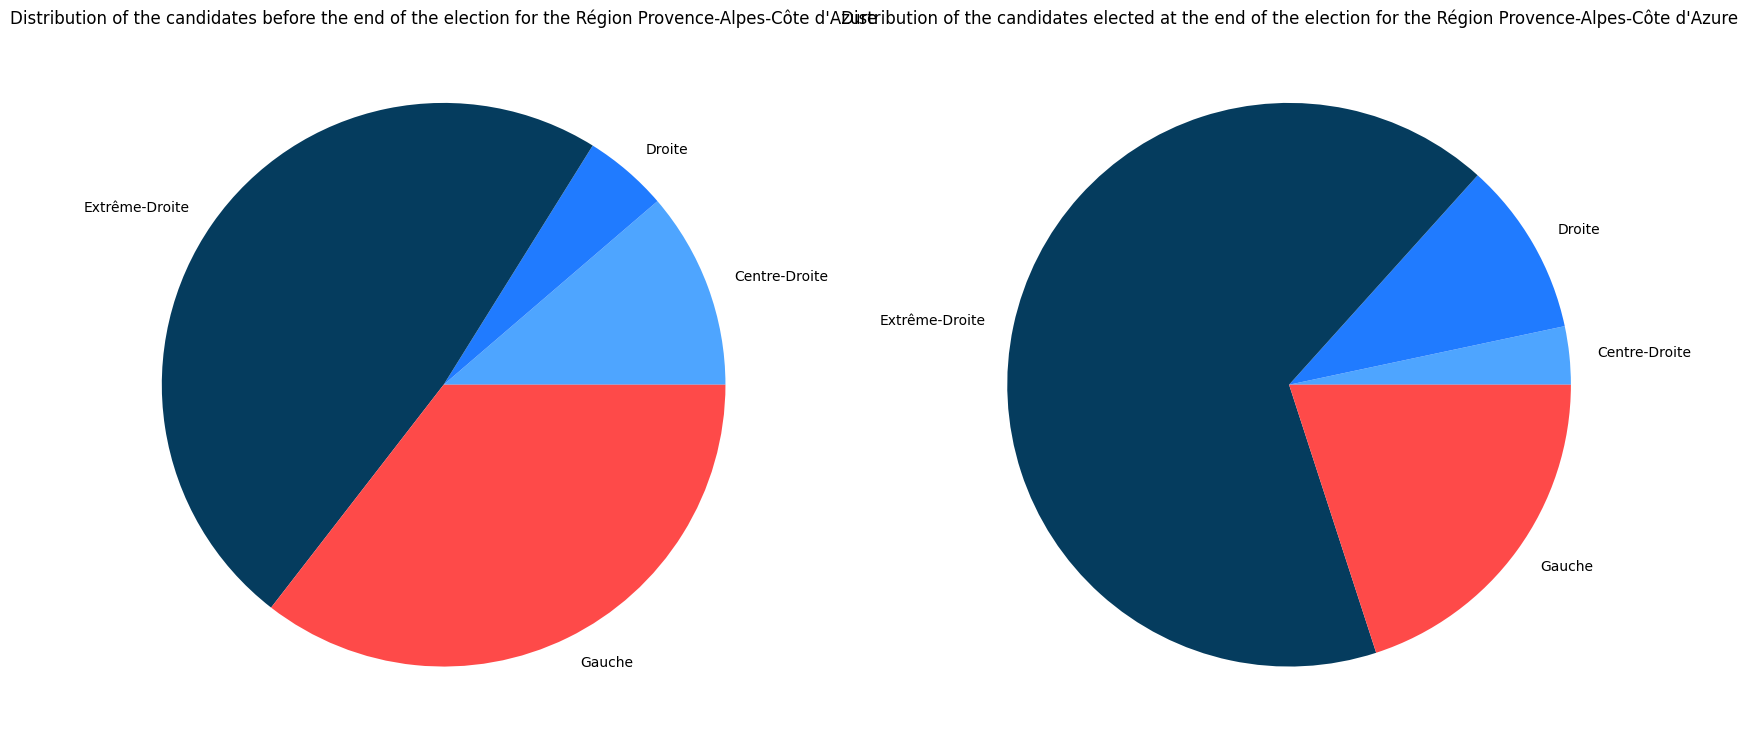

In [77]:
palette = {'Gauche-Radicale': '#ff6978', 'Gauche': '#fe4a49', "Centre": "#b1ede8", "Centre-Droite": "#4ea5ff", "Droite": "#207bff", "Extrême-Droite":"#053c5e", "Autres": "#773344"}

labels = ["Centre-Droite", "Droite", "Extrême-Droite","Gauche"]


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns

colors = ["#4ea5ff", "#207bff", "#053c5e", "#fe4a49"]

# Pie chart 1
axes[0].pie(x=tendencies_per_region_PACA['Count'], labels=labels, colors=colors)
axes[0].set_title('Distribution of the candidates before the end of the election for the Région Provence-Alpes-Côte d\'Azure')

# Pie chart 2
axes[1].pie(x=tendencies_per_region_elected_PACA['Count'], labels=labels, colors=colors)
axes[1].set_title('Distribution of the candidates elected at the end of the election for the Région Provence-Alpes-Côte d\'Azure')

In [78]:
# 501 members have been elected this second turn
df_elected

,Nom_complet,Sexe,Nuance,Elu,Région,Tendency
2,GIVERNET Olga,FEMININ,ENS,True,Auvergne-Rhône-Alpes,Centre-Droite
5,DIVE Julien,MASCULIN,LR,True,Hauts-de-France,Droite
6,RAY Nicolas,MASCULIN,LR,True,Auvergne-Rhône-Alpes,Droite
7,MONNET Yannick,MASCULIN,UG,True,Auvergne-Rhône-Alpes,Gauche
8,BOVET Jorys,MASCULIN,RN,True,Auvergne-Rhône-Alpes,Extrême-Droite
...,...,...,...,...,...,...
1082,DAVI Hendrik,MASCULIN,DVG,True,Provence-Alpes-Côte d'Azur,Gauche
1085,MAILLARD Sylvain,MASCULIN,ENS,True,Île-de-France,Centre-Droite
1086,AMIEL David,MASCULIN,ENS,True,Île-de-France,Centre-Droite
1087,LAUSSUCQ Jean,MASCULIN,ENS,True,Île-de-France,Centre-Droite


## Multivariate analysis of the gender distribution of elected candidates depending on Regions

In [79]:
sexe_per_region_elected = df_elected.groupby(['Région', 'Sexe']).size().reset_index(name='Count')

In [80]:
sexe_per_region_elected

,Région,Sexe,Count
0,Auvergne-Rhône-Alpes,FEMININ,23
1,Auvergne-Rhône-Alpes,MASCULIN,40
2,Bourgogne-Franche-Comté,FEMININ,11
3,Bourgogne-Franche-Comté,MASCULIN,14
4,Bretagne,FEMININ,12
5,Bretagne,MASCULIN,14
6,Centre-Val de Loire,FEMININ,3
7,Centre-Val de Loire,MASCULIN,20
8,Corse,MASCULIN,4
9,Grand Est,FEMININ,11


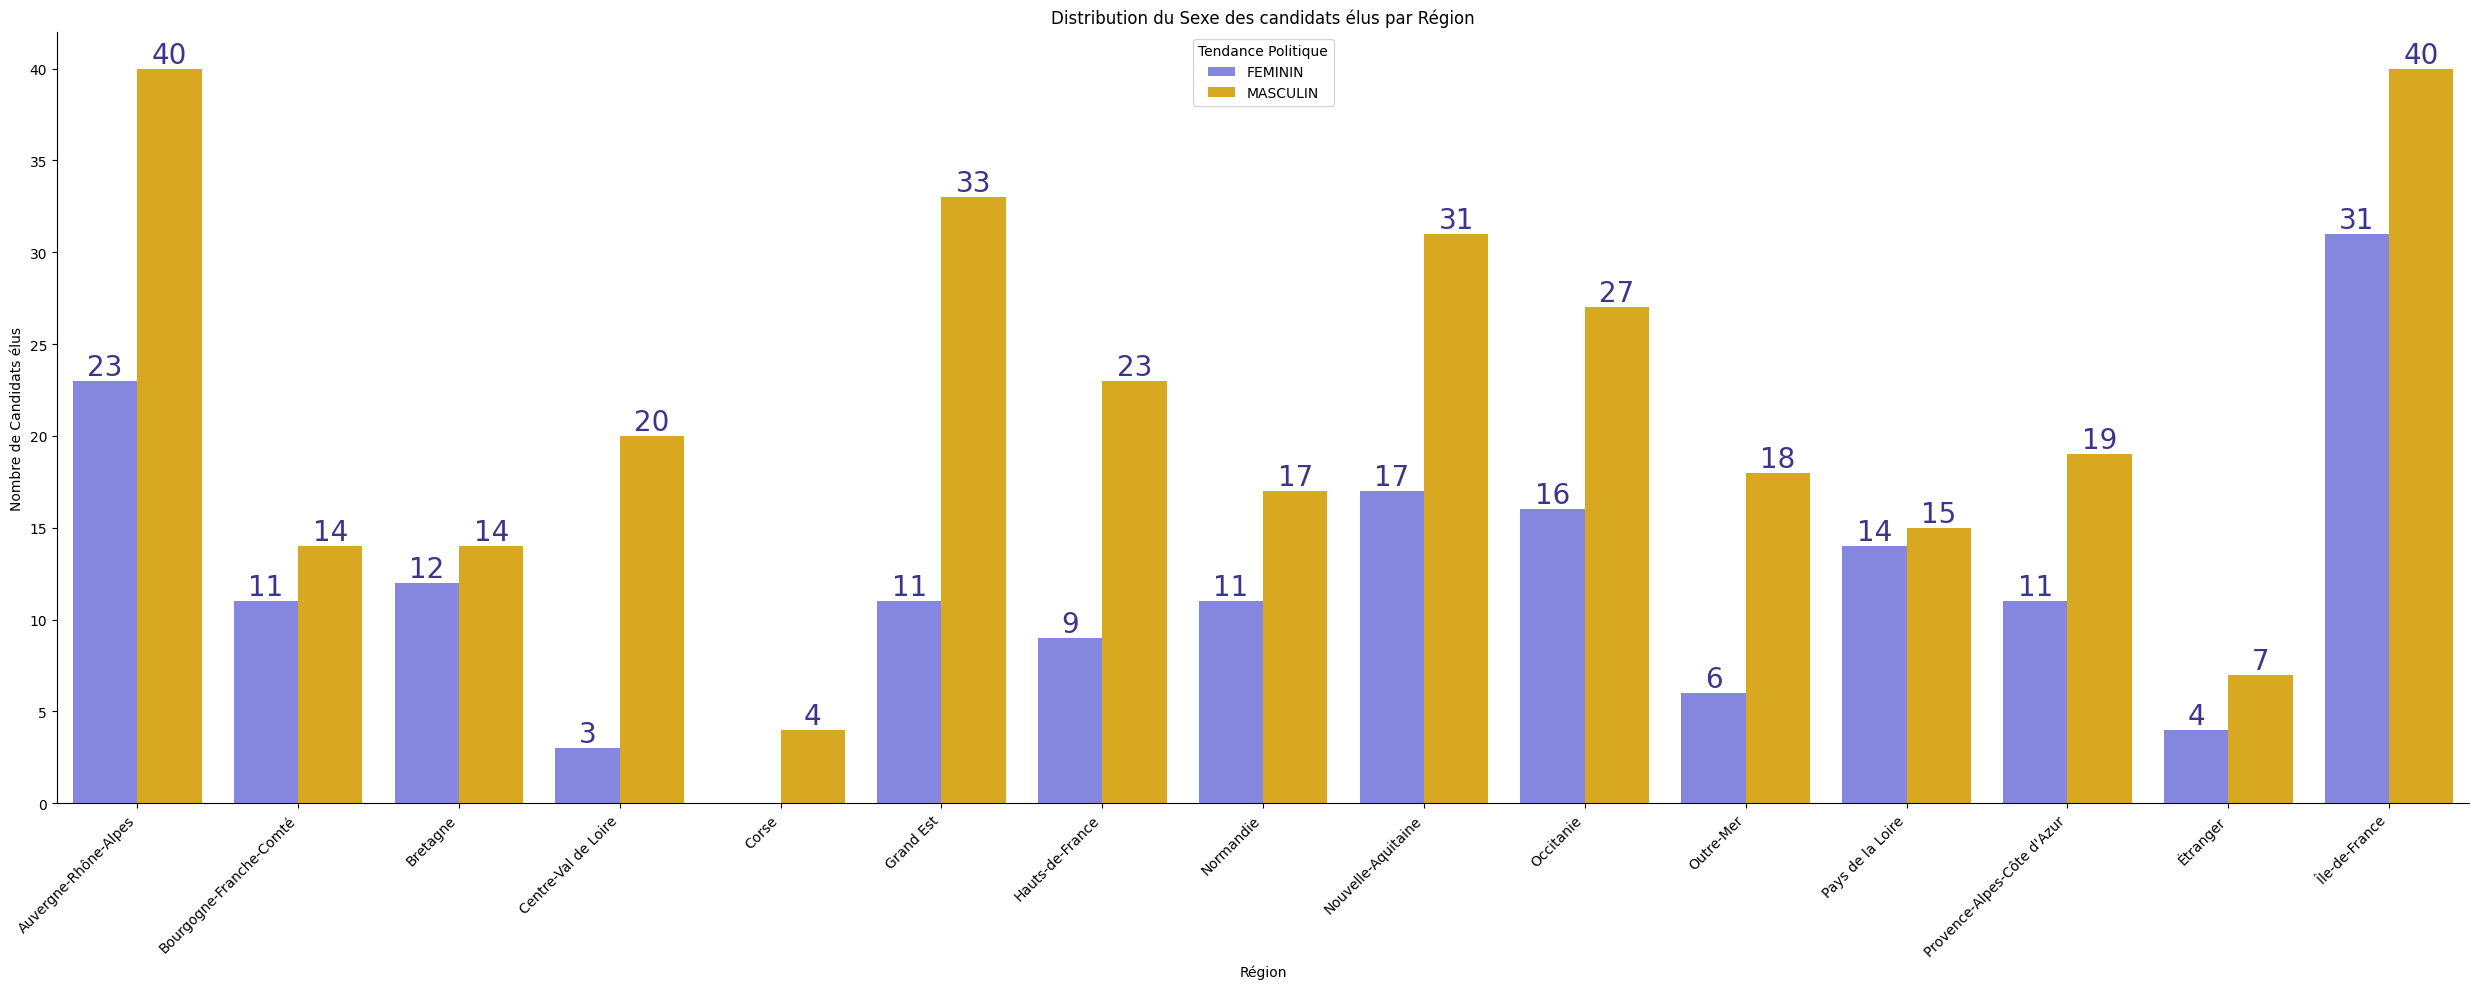

In [81]:
palette = {'MASCULIN': '#f7b801', 'FEMININ': '#7678ed'}

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(25, 10))  # Use plt.subplots() to get the ax object
sns.barplot(x='Région', y='Count', hue="Sexe", data=sexe_per_region_elected, dodge=True, palette=palette, legend="full", ax=ax)
for container in ax.containers:
    ax.bar_label(container, color=(61/255, 52/255, 139/255), size=20)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Région')
plt.ylabel('Nombre de Candidats élus')
plt.title('Distribution du Sexe des candidats élus par Région')
plt.legend(title='Tendance Politique')

plt.tight_layout()
plt.show()

In [82]:
df

,Code_département,Libellé_département,Code_commune,Libellé_commune,Inscrits,Votants,Pourcentage_Votants,Abstentions,Pourcentage_Abstentions,Exprimés,...,Nuance_candidat_18,Nom_candidat_18,Prénom_candidat_18,Sexe_candidat_18,Voix_18,Pourcentage_Voix/inscrits_18,Pourcentage_Voix/exprimés_18,Elu_18,Nombre_candidats,Libellé_Région
0,01,Ain,1001,L'Abergement-Clémenciat,662,494,74.62,168,25.38,476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
1,01,Ain,1002,L'Abergement-de-Varey,228,187,82.02,41,17.98,166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
2,01,Ain,1004,Ambérieu-en-Bugey,8745,5887,67.32,2858,32.68,5348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
3,01,Ain,1005,Ambérieux-en-Dombes,1337,979,73.22,358,26.78,926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
4,01,Ain,1006,Ambléon,98,65,66.33,33,33.67,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31387,ZZ,Français établis hors de France,ZZ235,Bahamas (Nassau),163,51,31.29,112,68.71,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Étranger
31388,ZZ,Français établis hors de France,ZZ236,Astana,93,49,52.69,44,47.31,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Étranger
31389,ZZ,Français établis hors de France,ZZ237,Mossoul,1,0,0.00,1,100.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Étranger
31390,ZZ,Français établis hors de France,ZZ238,Florence,4113,1379,33.53,2734,66.47,1291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Étranger


## Number of people registered to vote

In [83]:
Num_inscr = df["Inscrits"].sum()

In [84]:
Num_inscr

np.int64(43328508)

## Number of people that voted

In [85]:
Num_voters = df["Votants"].sum()

In [86]:
Num_voters

np.int64(28867759)

## Number of people that didn't vote

In [87]:
Num_abst = df["Abstentions"].sum()

In [88]:
Num_abst

np.int64(14460749)

C:\Users\Ronan\AppData\Local\Temp\ipykernel_13132\1279619050.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




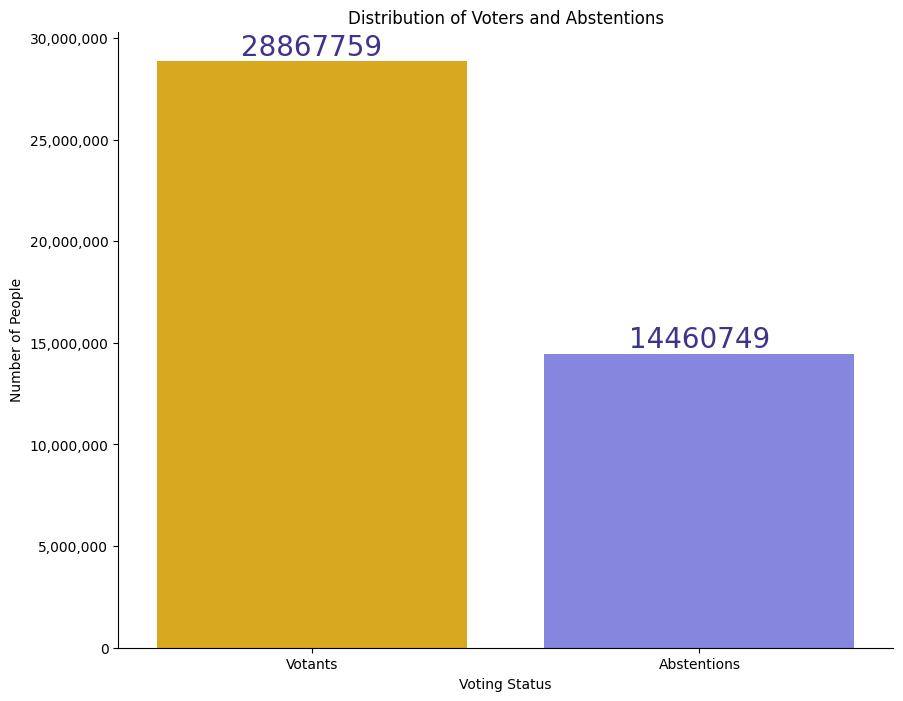

In [89]:
# Data for the barplot
data = {'Category': ['Votants', 'Abstentions'],
        'Count': [Num_voters, Num_abst]}

# Create the barplot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Category', y='Count', data=data,
                 palette={'Votants': '#f7b801', 'Abstentions': '#7678ed'})

# Add labels and title
plt.xlabel("Voting Status")
plt.ylabel("Number of People")
plt.title("Distribution of Voters and Abstentions")

# Customize the appearance
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Format y-axis labels (to avoid scientific notation)
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax = plt.gca()  # Get the current axes
# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, size=20, fmt='%d', color=(61/255, 52/255, 139/255))  # Add fmt='%d' to format bar labels

# Show the plot
plt.show()

## Compter le nombre de personnes inscrites sur la liste électorale

In [90]:
df_country =  df.rename(columns={"Votants": "Voters", "Abstentions": "Abstentionists", "Inscrits":"Registered"})

df_country.head(5)

,Code_département,Libellé_département,Code_commune,Libellé_commune,Registered,Voters,Pourcentage_Votants,Abstentionists,Pourcentage_Abstentions,Exprimés,...,Nuance_candidat_18,Nom_candidat_18,Prénom_candidat_18,Sexe_candidat_18,Voix_18,Pourcentage_Voix/inscrits_18,Pourcentage_Voix/exprimés_18,Elu_18,Nombre_candidats,Libellé_Région
0,01,Ain,1001,L'Abergement-Clémenciat,662,494,74.62,168,25.38,476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
1,01,Ain,1002,L'Abergement-de-Varey,228,187,82.02,41,17.98,166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
2,01,Ain,1004,Ambérieu-en-Bugey,8745,5887,67.32,2858,32.68,5348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
3,01,Ain,1005,Ambérieux-en-Dombes,1337,979,73.22,358,26.78,926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
4,01,Ain,1006,Ambléon,98,65,66.33,33,33.67,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes


In [91]:
df.head(5)

,Code_département,Libellé_département,Code_commune,Libellé_commune,Inscrits,Votants,Pourcentage_Votants,Abstentions,Pourcentage_Abstentions,Exprimés,...,Nuance_candidat_18,Nom_candidat_18,Prénom_candidat_18,Sexe_candidat_18,Voix_18,Pourcentage_Voix/inscrits_18,Pourcentage_Voix/exprimés_18,Elu_18,Nombre_candidats,Libellé_Région
0,01,Ain,1001,L'Abergement-Clémenciat,662,494,74.62,168,25.38,476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
1,01,Ain,1002,L'Abergement-de-Varey,228,187,82.02,41,17.98,166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
2,01,Ain,1004,Ambérieu-en-Bugey,8745,5887,67.32,2858,32.68,5348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
3,01,Ain,1005,Ambérieux-en-Dombes,1337,979,73.22,358,26.78,926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
4,01,Ain,1006,Ambléon,98,65,66.33,33,33.67,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes


In [92]:
df["Libellé_Région"].unique()

array(['Auvergne-Rhône-Alpes', 'Hauts-de-France',
       "Provence-Alpes-Côte d'Azur", 'Grand Est', 'Occitanie',
       'Normandie', 'Nouvelle-Aquitaine', 'Centre-Val de Loire',
       'Bourgogne-Franche-Comté', 'Bretagne', 'Corse', 'Pays de la Loire',
       'Île-de-France', 'Outre-Mer', 'Étranger'], dtype=object)

In [102]:
liste = ['Normandie', 'Centre-Val de Loire', 'Bretagne', 'Corse', 'Occitanie',
 'Nouvelle-Aquitaine', "Provence-Alpes-Côte d'Azur", 'Pays de la Loire',
 'Grand Est', 'Bourgogne-Franche-Comté', 'Île-de-France', 'Outre-Mer',
 'Étranger']

In [104]:
for region in df["Libellé_Région"].unique():
    if region not in liste:
        print(region)

Auvergne-Rhône-Alpes
Hauts-de-France
